# Cayley–Hamilton Theorem (CHT)

**Every square matrix in the real or complex field satisfies its own characteristic (eigenvalue) equation.**

# Controllability and Reachability

If and only if a system is controllable ie the controllability matrix $C(A, B)$ has full-row rank then any state is reachable.

Let us consider an example for control system eqaution: $Y = Ax+Bu$

Then $x$ is steerable to any vector in $R^n$ with some control input $u$.
If $y = eAt$ then by CHT it can be written as the sum of finite series of powers of $A$ upto $A^{n-1}$ with time varying coefficients.

#  Reachability

If a vector is reachable then an n ways of input control vector can be used to reach that vector.

# Using Cayley Hamilton Theorem

The vector can be represented as linear combination of finite scalar convolutions set of terms or integrals and controllable matrix.

Controllability is equivalent to reachability and vice versa.

If system is controllable then there are infinite control $U$ to reach the vector.

As $U$ is continuously varying function there are multiple degrees of freedom than $n \cdot q$ to reach the vector.

CHT helps to write convolution integral in terms of controllability matrix.

![](./images/ReachabilityControlability.png)

# Control a system in Matlab (Python)

## Inverted Pendulum

In Matlab / Python after developing the inverted pendulum equations using Jacobian Matrix and plugin the fixed points and linearized pendulum up and down condition and then check for controllability. One of eigen value of $A$ is unstable then the pendulum is moving To check controllability `Ctrb(A,B)4*4` if its rank is 4 then  system is controllable, else not. Further study can be made on stabilizing the system by measuring its parameters.

![](./images/InvertedPendulumMatlab.png)

State of system- Position of cart: $x$, angle of pendulum arm: $\Theta$

2 degrees of freedom system

Its nonlinearity can be linearized

Fixed points: Pendulum up or down and no velocities

In [ ]:
% Matlab
function dy = cartpend(y,m,M,L,g,d,u)

Sy = sin(y(3));
Cy = cos(y(3));
D = m*L*L*(M+m*(1-Cy^2));

dy(1,1) = y(2);
dy(2,1) = (1/D)*(-m^2*L^2*g*Cy*Sy + m*L^2*(m*L*y(4)^2*Sy - d*y(2))) + m*L*L*(1/D)*u;
dy(3,1) = y(4);
dy(4,1) = (1/D)*((m+M)*m*g*L*Sy - m*L*Cy*(m*L*y(4)^2*Sy - d*y(2))) - m*L*Cy*(1/D)*u +.01*randn;

In [ ]:
% Matlab
function drawcartpend(y,m,M,L)
x = y(1);
th = y(3);

% kinematics
% x = 3;        % cart position
% th = 3*pi/2;   % pendulum angle

% dimensions
% L = 2;  % pendulum length
W = 1*sqrt(M/5);  % cart width
H = .5*sqrt(M/5); % cart height
wr = .2; % wheel radius
mr = .3*sqrt(m); % mass radius

% positions
% y = wr/2; % cart vertical position
y = wr/2+H/2; % cart vertical position
w1x = x-.9*W/2;
w1y = 0;
w2x = x+.9*W/2-wr;
w2y = 0;

px = x + L*sin(th);
py = y - L*cos(th);

plot([-10 10],[0 0],'k','LineWidth',2)
hold on
rectangle('Position',[x-W/2,y-H/2,W,H],'Curvature',.1,'FaceColor',[1 0.1 0.1])
rectangle('Position',[w1x,w1y,wr,wr],'Curvature',1,'FaceColor',[0 0 0])
rectangle('Position',[w2x,w2y,wr,wr],'Curvature',1,'FaceColor',[0 0 0])

plot([x px],[y py],'k','LineWidth',2)

rectangle('Position',[px-mr/2,py-mr/2,mr,mr],'Curvature',1,'FaceColor',[.1 0.1 1])

% set(gca,'YTick',[])
% set(gca,'XTick',[])
xlim([-5 5]);
ylim([-2 2.5]);
set(gcf,'Position',[100 550 1000 400])
% box off
drawnow
hold off

In [ ]:
% Matlab
m = 1;
M = 5;
L = 2;
g = -10;
d = 1;

tspan = 0:.1:10;
y0 = [0; 0; pi; .5];
[t,y] = ode45(@(t,y)cartpend(y,m,M,L,g,d,0),tspan,y0);

for k=1:length(t)
    drawcartpend_bw(y(k,:),m,M,L);
end

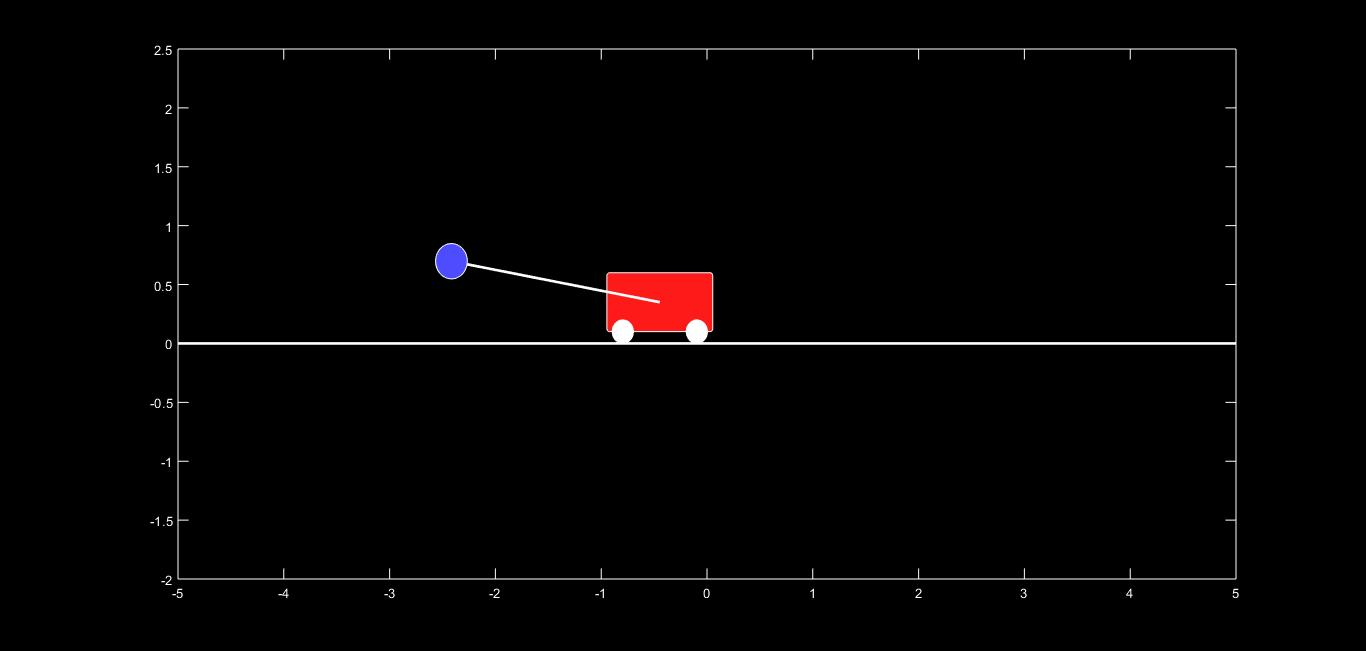

In [11]:
from IPython.display import Image
from IPython.core.display import HTML 

PATH = r"C:\Users\Dipika\Pictures\INVP.jpg"

Image(filename = PATH , width=800, height=800)

In [ ]:
% Matlab
m = 1;
M = 5;
L = 2;
g = -10;
d = 1;

s = 1; #pendulum up (s=1)

A = [0 1 0 0;
    0 -d/M -m*g/M 0;
    0 0 0 1;
    0 -s*d/(M*L) -s*(m+M)*g/(M*L) 0];

B = [0; 1/M; 0; s*1/(M*L)];
eig(A)

rank(ctrb(A,B))  % is it controllable

# Pole placement

# p is a vector of desired eigenvalues
# p = [-.01; -.02; -.03; -.04]; % not enough
p = [-.3; -.4; -.5; -.6];  # just barely
p = [-1; -1.1; -1.2; -1.3]; # good
p = [-2; -2.1; -2.2; -2.3]; # aggressive
p = [-3; -3.1; -3.2; -3.3]; # aggressive
# p = [-3.5; -3.6; -3.7; -3.8]; # breaks
K = place(A,B,p);
# K = lqr(A,B,Q,R);

tspan = 0:.001:10;
if(s==-1)
    y0 = [0; 0; 0; 0];
    [t,y] = ode45(@(t,y)cartpend(y,m,M,L,g,d,-K*(y-[4; 0; 0; 0])),tspan,y0);
elseif(s==1)
    y0 = [-3; 0; pi+.1; 0];
#     [t,y] = ode45(@(t,y)cartpend(y,m,M,L,g,d,-K*(y-[1; 0; pi; 0])),tspan,y0);
    [t,y] = ode45(@(t,y)cartpend(y,m,M,L,g,d,-K*(y-[1; 0; pi; 0])),tspan,y0);
else 
end

for k=1:100:length(t)
    drawcartpend_bw(y(k,:),m,M,L);
end


In [ ]:

ans =
         0
   -2.4674
   -0.1665
    2.4339


ans =
     4

>> ctrb(A,B)

ans =
         0    0.2000   -0.0400    0.2080
    0.2000   -0.0400    0.2080   -0.0816
         0    0.1000   -0.0200    0.6040
    0.1000   -0.0200    0.6040   -0.1408

>> rank(ctrb(A,B))

ans =
     4